# Plotting (age, metallicity) distribution functions

How to plot (age, metallicity) distribution functions with correct axis-labels and tick-labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import uq4pk_src

from uq4pk_src.observation_operator import ObservationOperator
G = ObservationOperator(max_order_hermite=4)

# get a distribution funtion
from uq4pk_src.distribution_function import RandomGMM_DistributionFunction
df = RandomGMM_DistributionFunction(modgrid=G.ssps)

Distribution functions should have shape (12, 53)


[Text(0, 0.08974358974358979, '-2'),
 Text(0, 0.3638888888888889, '-1'),
 Text(0, 0.7062499999999999, '0')]

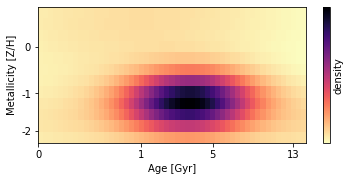

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

# plot with extent [0,1] in x- and y- dimension
# this is needed for correct axis tick labels
img = ax.imshow(
    df.F,
    extent=(0,1,0,1),
    aspect='auto',
    cmap=plt.cm.magma_r)  # my personal preference - light/dark for low/high density

# set colorbar
cbar = plt.colorbar(img)
cbar.set_ticks([])
cbar.set_label('density')

# label axes
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Metallicity [Z/H]')

# set x-axis tick labels
ax.set_xticks(G.ssps.img_t_ticks)
ax.set_xticklabels(G.ssps.t_ticks)

# set y-axis tick labels
ax.set_yticks(G.ssps.img_z_ticks)
ax.set_yticklabels(G.ssps.z_ticks)